# simple cnn on imdb sentiment dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
max_features = 5000 # extracted num of words from imdb
maxlen = 80 # num of words per single instance

In [3]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

Using TensorFlow backend.


In [4]:
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
print(x_test.shape, x_test.dtype)
print(y_test.shape, y_test.dtype)

(25000,) object
(25000,) int64
(25000,) object
(25000,) int64


In [5]:
np.unique(y_train) # it is binary classificaiton problem

array([0, 1])

([<matplotlib.axis.XTick at 0x121a5f630>,
 <a list of 2 Text xticklabel objects>)

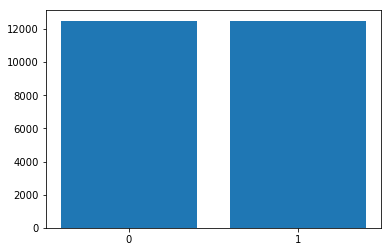

In [6]:
plt.bar(np.unique(y_train), [sum(y_train==0), sum(y_train==1)])
plt.xticks([0,1])

In [7]:
print(type(x_train[0])) # single instance is python list
print(x_train[0][:5]) # each word is replaced with single number (eg. 'I am here' -> [1, 93, 3])

<class 'list'>
[1, 14, 22, 16, 43]


In [8]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) # pad or truncate each instance so that it has only maxlen words
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(x_train.shape)
print(x_test.shape)

(25000, 80)
(25000, 80)


In [9]:
# reduce train, test size for time saving
idx = np.random.choice(25000, 2500, replace=False)
x_train = x_train[idx]
y_train = y_train[idx]
idx = np.random.choice(25000, 2500, replace=False)
x_test = x_test[idx]
y_test = y_test[idx]

print(x_train.shape)
print(x_test.shape)

(2500, 80)
(2500, 80)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 100)           500000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 78, 64)            19264     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 523,489.0
Trainable params: 523,489.0
Non-trainable params: 0.0
________________________________________________________________

In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Train on 2500 samples, validate on 2500 samples
Epoch 1/10
2500/2500 [==============================] - 3s - loss: 0.6911 - acc: 0.5260 - val_loss: 0.6797 - val_acc: 0.6176